In [ ]:
#importing the libraries 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib
import warnings
warnings.filterwarnings("ignore")
#so that it doesn't throw unnecessary errors 

In [16]:
#loading the data
data = pd.read_csv("data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.drop("customerID", axis=1, inplace=True)
# quick peek at the data
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"].fillna(data["TotalCharges"].median(), inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
#encoding categorical variables
label_encod = LabelEncoder()
for col in data.select_dtypes("object").columns:
    data[col] = label_encod.fit_transform(data[col])

#here we are encoding the catagorical variables to numerical values so that our model can process them further.

X = data.drop("Churn", axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)   

#dataset has been splitted to part
#defining the model




In [ ]:
#fuck that
#i'm gonna define  the model here
#suck on that 

xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss" #here we are specifying the evaluation metric to be logloss
    #now what does logloss mean?
    #lets find out
    #logloss is a measure of how well a classification model is able to predict the probability of a given class
    #it is calculated as the negative log of the likelihood of the true labels given the predicted probabilities
)


param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8,  1.0],
    'gamma': [0, 0.1, 0.2], 
}
#from here we will get the best parameters.

search_begins = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search_begins.fit(X_train, y_train)
best_model = search_begins.best_estimator_
y_pred = best_model.predict(X_test) 
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy of the best model: {acc*100:.2f}%")
print("Best Hyperparameters:", search_begins.best_params_)
print("model trained successfully")
print("best roc_auc score:", search_begins.best_score_)

#saving the model for joblib
joblib.dump(best_model, "customer_churn_model.pkl")
print("model saved successfully")   
joblib.dump(label_encod, "label_encoder.pkl")
print("label encoder saved successfully")
joblib.dump(X.columns, "model_features.pkl")
print("model features saved successfully")

print("all tasks completed successfully")



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Accuracy of the best model: 78.78%
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
model trained successfully
best roc_auc score: 0.8473726964903537
model saved successfully
label encoder saved successfully
model features saved successfully
all tasks completed successfully
Accuracy of the best model: 78.78%
Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.8}
model trained successfully
best roc_auc score: 0.8473726964903537
model saved successfully
label encoder saved successfully
model features saved successfully
all tasks completed successfully


In [20]:
#confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)  
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Confusion Matrix:
 [[1002   33]
 [ 266  108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1035
           1       0.77      0.29      0.42       374

    accuracy                           0.79      1409
   macro avg       0.78      0.63      0.64      1409
weighted avg       0.78      0.79      0.75      1409



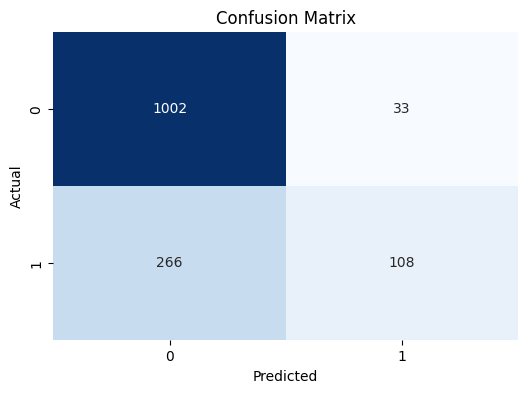

In [21]:
#sns heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()